In [128]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Establishing Connection to database

In [129]:
connection = sqlite3.connect('travel.sqlite')
cursor=connection.cursor()

In [130]:
cursor.execute("""select name from sqlite_master where type ='table';""")
table_list=[table[0] for table in cursor.fetchall()]
table_list

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

In [131]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


<Axes: title={'center': 'Aircrafts_model Vs Travel_range'}, ylabel='range'>

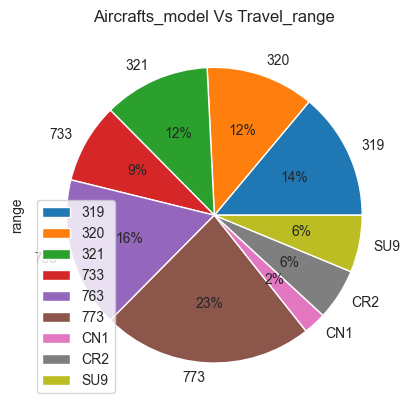

In [132]:
aircrafts_data.groupby(['aircraft_code']).sum().plot(kind="pie", x="model", y="range",autopct='%1.0f%%',title="Aircrafts_model Vs Travel_range")

In [133]:
aircrafts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aircraft_code  9 non-null      object
 1   model          9 non-null      object
 2   range          9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


In [134]:
aircrafts_data.describe()

,range
count,9.0
mean,5344.444444444444
std,3013.7647183842632
min,1200.0
25%,3000.0
50%,5600.0
75%,6700.0
max,11100.0


In [135]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [136]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [137]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [138]:
flights = pd.read_sql_query("select * from flights", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [139]:
seats = pd.read_sql_query("select * from seats", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [140]:
dff = pd.read_sql_query("""select aircraft_code, count('Business') fare_conditions from seats
                        group by aircraft_code """, connection)
dff

,aircraft_code,fare_conditions
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [141]:
df = pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        group by aircraft_code""", connection)

df.to_csv('aircraft_seats.csv')

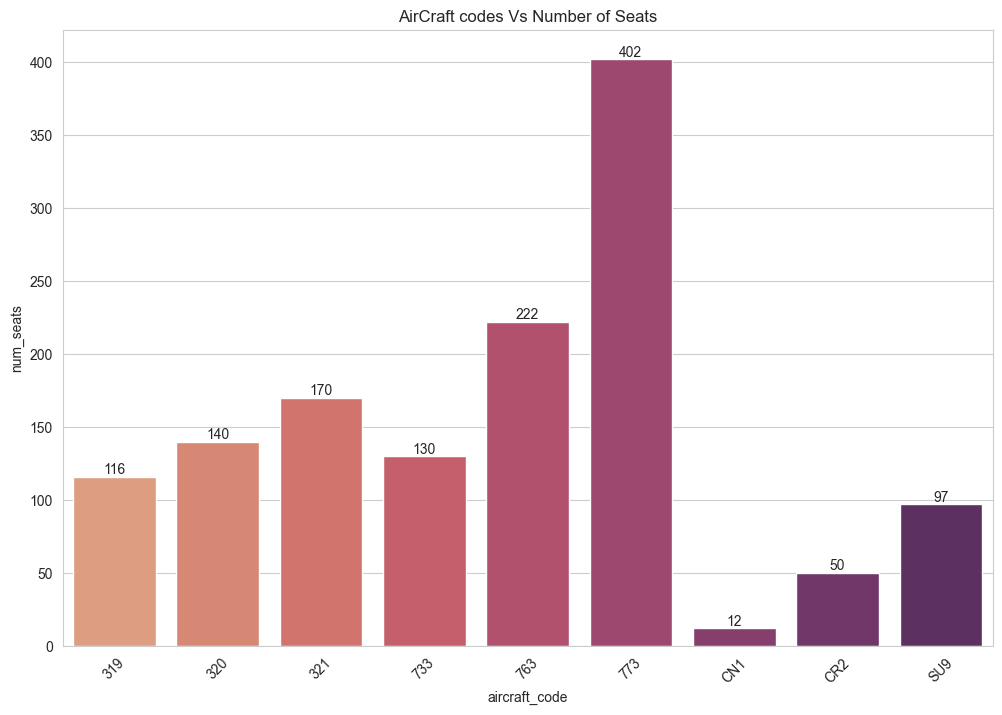

In [142]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='num_seats', data=df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirCraft codes Vs Number of Seats')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights.head()

In [ ]:
ticket_flights.describe()

In [ ]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets.head()

In [ ]:
for table in table_list:
    print('\ntable:', table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])

In [ ]:
for table in table_list:
    print('\ntable:', table)
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())

In [ ]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", connection)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])

tickets['date'] = tickets['book_date'].dt.date
tickets_count = tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(tickets_count.index, tickets_count['date'], marker = '^')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

In [ ]:
bookings = pd.read_sql_query("select * from bookings", connection)

bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
booking_amount = bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize=(18,6))
plt.plot(booking_amount.index, booking_amount['total_amount'], marker = '^')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

In [ ]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) 
                        from ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", connection)
df.to_csv('fare_avg_amount.csv')

In [ ]:
sns.barplot(data= df, x='aircraft_code', y='avg(amount)', hue='fare_conditions')
plt.title('Class wise Average Flight Prices')

In [ ]:
revenue = pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", connection)
revenue.to_csv('revenue.csv')

In [ ]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate from
                (select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id) as a
                    inner join 
                    (select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", connection
                  )
occupancy_rate

#Annual Turnover if the occupancy rate increases by 15%

In [ ]:
occupancy_rate['inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.15
occupancy_rate

In [ ]:
pd.set_option("display.float_format",str)

In [ ]:
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", connection)
total_revenue

occupancy_rate['inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate